In [1]:
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

Date range: 2013-10-01 to 2021-01-04
Min 1BTC = $108.58
Min price occurred on 2013-10-03
Max 1BTC = $33002.54
Max price occurred on 2021-01-03


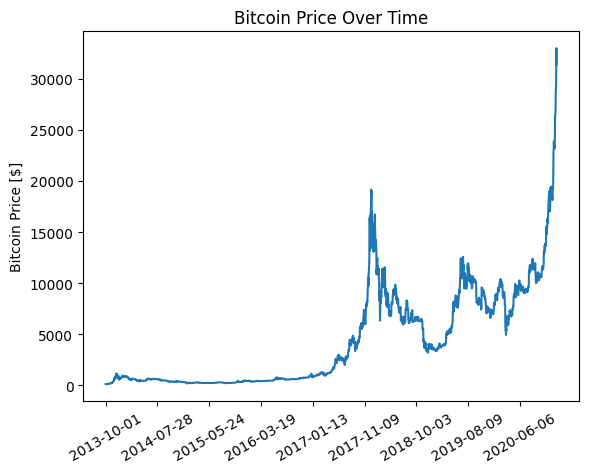

In [17]:
import urllib.request, csv, io
from collections import defaultdict
import matplotlib.pyplot as plt

def load_csv_from_url(url):
    with urllib.request.urlopen(url) as response:
        csv_data = response.read().decode('utf-8')
        csv_file = io.StringIO(csv_data)
        csv_reader = csv.DictReader(csv_file)

        # Store all data into a dictionary
        data_dict = defaultdict(list)
        for row in csv_reader:
            for key, value in row.items():
                data_dict[key].append(value)

        return data_dict

# Load data from URL
bitcoin_url = 'https://raw.githubusercontent.com/RDeconomist/observatory/main/Bitcoin%20Price.csv'
bitcoin_data = load_csv_from_url(bitcoin_url)

# Extract date and price data
date = bitcoin_data['Date']
price = [float(v) for v in bitcoin_data['Closing Price (USD)']]

## Part (a): Find min and max prices and corresponding dates
min_price = min(price)
max_price = max(price)

min_index = price.index(min_price)
max_index = price.index(max_price)

print(f'Date range: {date[0]} to {date[-1]}')
print(f'Min 1BTC = ${min_price:.2f}')
print(f'Min price occurred on {date[min_index]}')
print(f'Max 1BTC = ${max_price:.2f}')
print(f'Max price occurred on {date[max_index]}')

# Plot price data
plt.plot(price)
plt.ylabel('Bitcoin Price [$]')
plt.gca().set_xticks(range(0, len(date), 300))
plt.gca().set_xticklabels(date[::300], rotation=30)
plt.title('Bitcoin Price Over Time')
plt.show()


In [18]:
len(price)

2613

In [19]:
import torch
from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
    def __init__(self, time_series, sequence_length):
        self.time_series = time_series
        self.sequence_length = sequence_length

    def __len__(self):
        # The total number of sequences in the time_series
        return len(self.time_series) - self.sequence_length

    def __getitem__(self, idx):
        # Extract the time sequence
        sequence = self.time_series[idx : (idx + self.sequence_length)]
        # Convert the sequence to a PyTorch tensor
        sequence = torch.tensor(sequence)
        return sequence

# Part (b)
print('=== Dataset ===')
dataset = TimeSeriesDataset(price, 30)
target_index = date.index('2017-12-01')
p = dataset[target_index]
print(f"Prices starting on 2017-12-01:\n ", p)

=== Dataset ===
Prices starting on 2017-12-01:
  tensor([ 9706.1035, 10923.2012, 10973.5439, 11382.2090, 11597.2314, 12230.3652,
        13734.5195, 16403.4219, 15732.0996, 13152.5283, 16299.2979, 16374.8975,
        16678.2871, 16246.1387, 17221.6504, 17436.5977, 19166.9785, 18640.2617,
        18984.7676, 16862.5703, 16925.0176, 14182.4648, 14694.5820, 14103.2188,
        13387.3486, 14652.3672, 15846.0742, 14362.4033, 14867.5723, 13643.6953])


### Linear Regression
Let's fit a linear regression model to predict the bitcoin price on the 10th day from the previous 9 days.

In [50]:
def loss(pred, y):
    """Mean Absolute Error loss"""
    return (pred - y).abs().mean()

# Part (d)
def train(model, loss, dataloader, optimizer):
    """Helper function to train our model."""
    total_error = 0.
    for it, sequences in enumerate(dataloader):
        # Prepare model inputs and targets
        price_history = sequences[:, :9]
        target = sequences[:, -1]
        # Compute model predictions
        pred = model(price_history)
        # Compute the loss
        l = loss(pred, target)
        total_error += l.item()
        # Update the weights
        optimizer.zero_grad()  # Clear the gradients
        l.backward()  # Backpropagation
        optimizer.step()  # Update the model weights
    return total_error / len(dataloader)

def fit(model, loss, dataloader, epochs=30):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for ep in range(epochs):
        err = train(model, loss, dataloader, optimizer)
        print(f"[Ep{ep}] Error {err:.3f}")

price_history_len = 10
lr = 0.0005
batch_size = 32
epochs = 300

# Part (c)
model = nn.Linear(in_features=9, out_features=1)
dataset = TimeSeriesDataset(price, price_history_len)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
fit(model, loss, dataloader, epochs=epochs)

[Ep0] Error 5672.930
[Ep1] Error 4326.833
[Ep2] Error 4026.067
[Ep3] Error 4023.173
[Ep4] Error 4012.734
[Ep5] Error 4025.728
[Ep6] Error 4017.178
[Ep7] Error 4017.781
[Ep8] Error 4023.927
[Ep9] Error 4011.991
[Ep10] Error 4007.750
[Ep11] Error 4009.470
[Ep12] Error 4015.672
[Ep13] Error 4007.969
[Ep14] Error 4006.800
[Ep15] Error 4001.535
[Ep16] Error 4012.020
[Ep17] Error 4015.863
[Ep18] Error 4009.041
[Ep19] Error 4006.799
[Ep20] Error 4016.354
[Ep21] Error 4004.125
[Ep22] Error 4012.177
[Ep23] Error 4011.736
[Ep24] Error 4007.859
[Ep25] Error 4014.734
[Ep26] Error 4011.939
[Ep27] Error 4009.344
[Ep28] Error 4018.528
[Ep29] Error 4012.901
[Ep30] Error 4022.619
[Ep31] Error 4014.874
[Ep32] Error 4003.760
[Ep33] Error 4014.397
[Ep34] Error 4009.345
[Ep35] Error 4008.765
[Ep36] Error 4004.516
[Ep37] Error 4018.724
[Ep38] Error 4000.186
[Ep39] Error 4009.327
[Ep40] Error 4025.034
[Ep41] Error 4019.089
[Ep42] Error 4025.503
[Ep43] Error 4013.457
[Ep44] Error 4004.051
[Ep45] Error 4023.15

/var/folders/tn/v9tpvrrs4qgdbw0xd1q0l8qh0000gn/T/ipykernel_30220/1442675984.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(date, rotation=30)


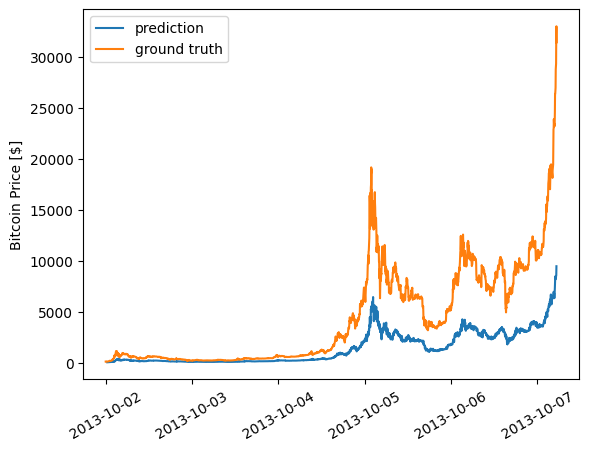

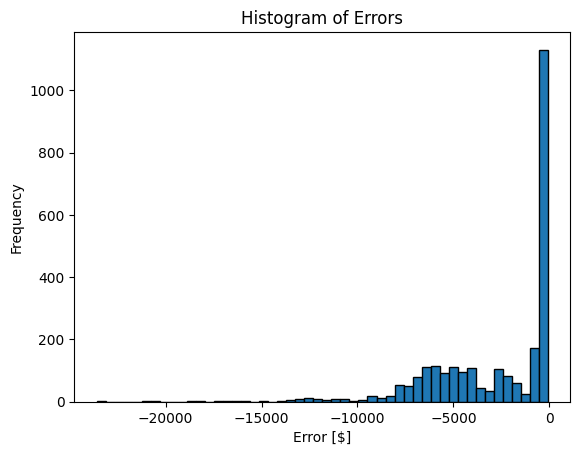

In [55]:
with torch.no_grad():
    predictions, errors = [], []
    for i in range(len(dataset)):
        sequence = dataset[i]
        past, price_gt = sequence[0:-1], sequence[-1]
        price_pred = model(past)

        err = price_pred - price_gt

        errors.append(err.item())
        predictions.append(price_pred.item())

plt.plot([None]*9+predictions, label='prediction')
plt.plot(price, label='ground truth')
plt.ylabel('Bitcoin Price [$]')
plt.gca().set_xticklabels(date, rotation=30)
plt.legend()
plt.show()

plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel('Error [$]')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.show()